In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import time
import tensorflow as tf

# Read our New York registrations Dataset

In [2]:
NYS_registrations_df = pd.read_csv('Resources/NYS Electric Vehicle Registrations.csv')
NYS_registrations_df.head()

,Record Type,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Unladen Weight,Maximum Gross Weight,Passengers,Reg Valid Date,Reg Expiration Date,Color,Scofflaw Indicator,Suspension Indicator,Revocation Indicator
0,VEH,96722014661,SRF,BOVINA,NY,13740,DELAWARE,1972,SAAB,2DSD,ELECTRIC,2000.0,NaN,NaN,05/04/2021,06/26/2023,WH,N,N,N
1,VEH,9106843,SRF,GLENDALE,NY,11385,QUEENS,1974,EVA,4DSD,ELECTRIC,2180.0,NaN,NaN,09/21/2021,10/03/2023,BR,N,N,N
2,VEH,909SR2223A,SRF,STAFFORD,NY,14143,GENESEE,1979,CITIC,2DSD,ELECTRIC,850.0,NaN,NaN,05/12/2021,04/01/2023,GR,N,N,N
3,VEH,9E2SPAXBC113501,PSD,JOHNSTOWN,NY,12095,FULTON,2012,VANTA,PICK,ELECTRIC,1900.0,NaN,NaN,07/01/2014,NaN,WH,N,N,N
4,VEH,9A204759,SPC,BROOKLYN,NY,11211,KINGS,2014,CROWN,P/SH,ELECTRIC,3335.0,NaN,NaN,12/09/2021,12/31/2022,WH,N,N,N


In [3]:
NYS_registrations_df.columns

Index(['Record Type', 'VIN', 'Registration Class', 'City', 'State', 'Zip',
       'County', 'Model Year', 'Make', 'Body Type', 'Fuel Type',
       'Unladen Weight', 'Maximum Gross Weight', 'Passengers',
       'Reg Valid Date', 'Reg Expiration Date', 'Color', 'Scofflaw Indicator',
       'Suspension Indicator', 'Revocation Indicator'],
      dtype='object')

In [4]:
#  Let's drop the columns we will not use
drop_cols = ['Record Type', 'Unladen Weight', 'Maximum Gross Weight', 'Passengers',
          'Reg Expiration Date', 'Color', 'Scofflaw Indicator',
       'Suspension Indicator', 'Revocation Indicator']
NYS_registrations_df.drop(drop_cols, axis=1, inplace=True)
NYS_registrations_df.head()

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Reg Valid Date
0,96722014661,SRF,BOVINA,NY,13740,DELAWARE,1972,SAAB,2DSD,ELECTRIC,05/04/2021
1,9106843,SRF,GLENDALE,NY,11385,QUEENS,1974,EVA,4DSD,ELECTRIC,09/21/2021
2,909SR2223A,SRF,STAFFORD,NY,14143,GENESEE,1979,CITIC,2DSD,ELECTRIC,05/12/2021
3,9E2SPAXBC113501,PSD,JOHNSTOWN,NY,12095,FULTON,2012,VANTA,PICK,ELECTRIC,07/01/2014
4,9A204759,SPC,BROOKLYN,NY,11211,KINGS,2014,CROWN,P/SH,ELECTRIC,12/09/2021


In [5]:
# Registration VIN count
Registration = NYS_registrations_df.VIN.count()
Registration

62063

In [6]:
NYS_registrations_df['Reg Valid Date'] = pd.to_datetime(NYS_registrations_df['Reg Valid Date'])
NYS_registrations_df.head()

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,Reg Valid Date
0,96722014661,SRF,BOVINA,NY,13740,DELAWARE,1972,SAAB,2DSD,ELECTRIC,2021-05-04
1,9106843,SRF,GLENDALE,NY,11385,QUEENS,1974,EVA,4DSD,ELECTRIC,2021-09-21
2,909SR2223A,SRF,STAFFORD,NY,14143,GENESEE,1979,CITIC,2DSD,ELECTRIC,2021-05-12
3,9E2SPAXBC113501,PSD,JOHNSTOWN,NY,12095,FULTON,2012,VANTA,PICK,ELECTRIC,2014-07-01
4,9A204759,SPC,BROOKLYN,NY,11211,KINGS,2014,CROWN,P/SH,ELECTRIC,2021-12-09


In [7]:
# We will be using the m/y information to clean duplicates 
NYS_registrations_df['month/year'] = NYS_registrations_df['Reg Valid Date'].dt.strftime("%m-%Y")

# Then we will adjust the index of our New York registration Database
NYS_registrations_df.set_index('Reg Valid Date', inplace=True)
NYS_registrations_df.head()

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,month/year
Reg Valid Date,,,,,,,,,,,
2021-05-04,96722014661,SRF,BOVINA,NY,13740,DELAWARE,1972,SAAB,2DSD,ELECTRIC,05-2021
2021-09-21,9106843,SRF,GLENDALE,NY,11385,QUEENS,1974,EVA,4DSD,ELECTRIC,09-2021
2021-05-12,909SR2223A,SRF,STAFFORD,NY,14143,GENESEE,1979,CITIC,2DSD,ELECTRIC,05-2021
2014-07-01,9E2SPAXBC113501,PSD,JOHNSTOWN,NY,12095,FULTON,2012,VANTA,PICK,ELECTRIC,07-2014
2021-12-09,9A204759,SPC,BROOKLYN,NY,11211,KINGS,2014,CROWN,P/SH,ELECTRIC,12-2021


# Looking for duplicates

In [8]:
# let's see the duplicates accross the data set
duplicates = NYS_registrations_df[NYS_registrations_df.duplicated()]
duplicates.count()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
month/year            0
dtype: int64

In [9]:
# inspection of City duplicates
NYS_registrations_df[NYS_registrations_df.duplicated('City')]

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,month/year
Reg Valid Date,,,,,,,,,,,
2022-01-31,7SAYGDEF9NF365467,PAS,BROOKLYN,NY,11249,KINGS,2022,TESLA,SUBN,ELECTRIC,01-2022
2022-01-12,7SAYGDEF9NF337765,OMT,BROOKLYN,NY,11229,KINGS,2022,TESLA,SUBN,ELECTRIC,01-2022
2021-12-15,7SAYGDEF9NF328094,PAS,BRONX,NY,10465,BRONX,2022,TESLA,SUBN,ELECTRIC,12-2021
2021-12-18,7SAYGDEF9NF326491,PAS,NEW YORK,NY,10025,NEW YORK,2022,TESLA,SUBN,ELECTRIC,12-2021
2022-01-18,7SAYGDEF9NF325096,PAS,STATEN ISLAND,NY,10305,RICHMOND,2022,TESLA,SUBN,ELECTRIC,01-2022
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,A976B08198T,SPC,BROOKLYN,NY,11232,KINGS,2019,YALE,SWT,ELECTRIC,10-2021
2021-10-27,A976B07325S,SPC,BROOKLYN,NY,11232,KINGS,2018,YALE,P/SH,ELECTRIC,10-2021
2021-10-27,A976B06198R,SPC,BROOKLYN,NY,11232,KINGS,2017,YALE,P/SH,ELECTRIC,10-2021


In [10]:
# inspection of Date/VIN/County duplicates
inspection= NYS_registrations_df[NYS_registrations_df.duplicated(subset=['month/year','VIN', 'County'], keep=False)].sort_values('VIN')
inspection.count()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
month/year            0
dtype: int64

In [11]:
# inspection of Date/VIN duplicates
inspect_date_vin = NYS_registrations_df[NYS_registrations_df.duplicated(subset=['month/year','VIN'], keep=False)].sort_values('VIN')
inspect_date_vin.count()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
month/year            0
dtype: int64

# Addressing potential Null Values

In [12]:
NYS_registrations_df.isna().sum()

VIN                   0
Registration Class    0
City                  0
State                 0
Zip                   0
County                0
Model Year            0
Make                  0
Body Type             0
Fuel Type             0
month/year            0
dtype: int64

In [13]:
NYS_registrations_df['Make'].unique()

array(['SAAB', 'EVA', 'CITIC', 'VANTA', 'CROWN', 'DE/EL', 'MANIT',
       'HONDA', 'TESLA', 'AMPER', 'PROTE', 'VOLVO', 'CENNT', 'ARCIM',
       'RIVIA', 'TOYOT', 'WORKH', 'GENZE', 'LEXUS', 'ALTA', 'ZERO',
       'ZE/MO', 'AZURE', 'FORD', 'THINK', 'GREEN', 'SCOUT', 'NAVIS',
       'INTER', 'STAR', 'POLAR', 'GEM', 'GLOBA', 'LINDE', 'BRAMM',
       'AM/GE', 'KARMA', 'KARM', 'LUCID', 'CRUS', 'MOKE', 'CR/CA', 'TESL',
       'BMW', 'TO/OU', 'ACURA', 'CLUBC', 'CL/CA', 'CLUB', 'PATH', 'ZO/EL',
       'NEWFL', 'NE/FL', 'COLUM', 'TOMBE', 'SPARK', 'SMITH', 'UTILI',
       'NOVA', 'NOVB', 'NO/BU', 'IC', 'CR/CO', 'MITSU', 'LINCO', 'RAM',
       'ZENIT', 'ZENTI', 'FIAT', 'PIAGG', 'CHEVR', 'GMC', 'ZENN', 'CHRYS',
       'LION', 'GILLI', 'DETRO', 'VOLKS', 'ASVE', 'EA/BE', 'COM', 'COMUT',
       'CO/CA', 'KALMA', 'AMPHI', 'CRAYL', 'CUSHM', 'EZ/GO', 'OHAWA',
       'ORANG', 'ORAN', 'ZELEC', 'ZEV', 'ORION', 'OROIN', 'ORON', 'IRION',
       'OTION', 'NISSA', 'PRO', 'JOHND', 'JO/DE', 'LI/SE', 'STING',
    

In [14]:
len(NYS_registrations_df['Make'].unique())

197

In [15]:
# Next we can see some vehicles name are just mispelled or have an a different name , we will group by the OEM.
NYS_registrations_df['Make'].replace(['CROWN', 'TOYOT'], 'TOYOTA', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['ORION','OTION','OROIN','IRION','ORON','ENERG'], 'FORD', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['NOVB', 'NOVA','IRION'], 'NOVA BUS', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['NEWFL', 'NE/FL'], 'NEW FLYER', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['DOOH', 'DOOHA'], 'DOOHAN', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['JAGUA','JAG'], 'JAGUAR', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['ORAN','ORANG'], 'ORANGE EV', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['MILE','MILES'], 'MILES EV', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['GENU','GENUI'], 'GENESIS', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['KARM', 'FISKE','KALMA'], 'KARMA', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['PIAGG','VESPA'], 'PIAGGIO', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['ZERO','ZE/MO'], 'ZERO EV', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['POLRD','POLAR','POLES','POLE'], 'POLESTAR', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['CITIC','CITC'], 'HONDA', 
                    inplace=True)
NYS_registrations_df['Make'].replace(['VOLKS', 'SCOUT'],'VOLKSWAGEN',
                    inplace=True)
NYS_registrations_df['Make'].replace(['CHRIS','CHRYS','CRAYL'], 
                    'CHRYSLER', inplace=True)
NYS_registrations_df['Make'].replace('SUBAR', 'SUBARU', inplace=True)
NYS_registrations_df['Make'].replace('TESL', 'TESLA', inplace=True)
NYS_registrations_df['Make'].replace('FREIG', 'FREIGHT LINER', inplace=True)
NYS_registrations_df['Make'].replace('PORSC', 'PORSCHE', inplace=True)
NYS_registrations_df['Make'].replace('NIUU', 'NIU', inplace=True)
NYS_registrations_df['Make'].replace('LINCO', 'LINCOLN', inplace=True)
NYS_registrations_df['Make'].replace('VANTA', 'BMW', inplace=True)
NYS_registrations_df['Make'].replace('CASE', 'CAKE', inplace=True)
NYS_registrations_df['Make'].replace('NISSA', 'NISSAN', inplace=True)
NYS_registrations_df['Make'].replace('SUZUK', 'SUZUKI', inplace=True)
NYS_registrations_df['Make'].replace('RIVIA', 'RIVIAN', inplace=True)
NYS_registrations_df['Make'].replace('GREEN', 'GREENPOWER MOTORS', inplace=True)
NYS_registrations_df['Make'].replace('HYUND', 'HYUNDAI', inplace=True)
NYS_registrations_df['Make'].replace('CENNT', 'CENNTRO', inplace=True)
NYS_registrations_df['Make'].replace('PROTE', 'PROTERRA', inplace=True)
NYS_registrations_df['Make'].replace(['INTER','STAR','OTHER'], 'INTERNATIONAL',
                                     inplace=True)
NYS_registrations_df['Make'].replace(['MITSU','FUSO' ],'MITSUBISHI', 
                                     inplace=True)
NYS_registrations_df['Make'].replace(['IC','ICE','IC/PN' ],'ICBUS', 
                                     inplace=True)
NYS_registrations_df['Make'].replace('ZELEC', 'ZELECTRIC MOTORS', inplace=True)
NYS_registrations_df['Make'].replace('KAWAS', 'KAWASAKI', inplace=True)
NYS_registrations_df['Make'].replace('EVA', 'EVI', inplace=True)
NYS_registrations_df['Make'].replace('EVTA', 'EVT', inplace=True)
NYS_registrations_df['Make'].replace('CHEVR', 'CHEVROLET', inplace=True)

In [16]:
NYS_registrations_df['Make'].unique()

array(['SAAB', 'EVI', 'HONDA', 'BMW', 'TOYOTA', 'DE/EL', 'MANIT', 'TESLA',
       'AMPER', 'PROTERRA', 'VOLVO', 'CENNTRO', 'ARCIM', 'RIVIAN',
       'WORKH', 'GENZE', 'LEXUS', 'ALTA', 'ZERO EV', 'AZURE', 'FORD',
       'THINK', 'GREENPOWER MOTORS', 'VOLKSWAGEN', 'NAVIS',
       'INTERNATIONAL', 'POLESTAR', 'GEM', 'GLOBA', 'LINDE', 'BRAMM',
       'AM/GE', 'KARMA', 'LUCID', 'CRUS', 'MOKE', 'CR/CA', 'TO/OU',
       'ACURA', 'CLUBC', 'CL/CA', 'CLUB', 'PATH', 'ZO/EL', 'NEW FLYER',
       'COLUM', 'TOMBE', 'SPARK', 'SMITH', 'UTILI', 'NOVA BUS', 'NO/BU',
       'ICBUS', 'CR/CO', 'MITSUBISHI', 'LINCOLN', 'RAM', 'ZENIT', 'ZENTI',
       'FIAT', 'PIAGGIO', 'CHEVROLET', 'GMC', 'ZENN', 'CHRYSLER', 'LION',
       'GILLI', 'DETRO', 'ASVE', 'EA/BE', 'COM', 'COMUT', 'CO/CA',
       'AMPHI', 'CUSHM', 'EZ/GO', 'OHAWA', 'ORANGE EV',
       'ZELECTRIC MOTORS', 'ZEV', 'NISSAN', 'PRO', 'JOHND', 'JO/DE',
       'LI/SE', 'STING', 'HA/DA', 'LIVEW', 'MEVH', 'CADIL',
       'FREIGHT LINER', 'TRANT', 'EGO', 'ETU

In [17]:
len(NYS_registrations_df['Make'].unique())
# A DROP FROM 197 TO 166

162

In [18]:
NYS_registrations_df

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,month/year
Reg Valid Date,,,,,,,,,,,
2021-05-04,96722014661,SRF,BOVINA,NY,13740,DELAWARE,1972,SAAB,2DSD,ELECTRIC,05-2021
2021-09-21,9106843,SRF,GLENDALE,NY,11385,QUEENS,1974,EVI,4DSD,ELECTRIC,09-2021
2021-05-12,909SR2223A,SRF,STAFFORD,NY,14143,GENESEE,1979,HONDA,2DSD,ELECTRIC,05-2021
2014-07-01,9E2SPAXBC113501,PSD,JOHNSTOWN,NY,12095,FULTON,2012,BMW,PICK,ELECTRIC,07-2014
2021-12-09,9A204759,SPC,BROOKLYN,NY,11211,KINGS,2014,TOYOTA,P/SH,ELECTRIC,12-2021
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,A976B08198T,SPC,BROOKLYN,NY,11232,KINGS,2019,YALE,SWT,ELECTRIC,10-2021
2021-10-27,A976B07325S,SPC,BROOKLYN,NY,11232,KINGS,2018,YALE,P/SH,ELECTRIC,10-2021
2021-10-27,A976B06198R,SPC,BROOKLYN,NY,11232,KINGS,2017,YALE,P/SH,ELECTRIC,10-2021


In [19]:
NYS_registrations_df['Make' ].value_counts()

TESLA        37137
NIU           6918
HYUNDAI       3130
FORD          3082
CHEVROLET     3044
             ...  
CUSHM            1
AMPHI            1
CO/CA            1
COMUT            1
TCM              1
Name: Make, Length: 162, dtype: int64

In [20]:
# Looking at the Make for Yale to see if it's actually a car.
# base on the registration class  SPC stand for self parking cars as found here https://www.allacronyms.com/SPC/car
NYS_registrations_df[NYS_registrations_df['Make' ]=='YALE']

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,month/year
Reg Valid Date,,,,,,,,,,,
2021-12-09,N336261,SPC,HAUPPAUGE,NY,11788,SUFFOLK,1978,YALE,SWT,ELECTRIC,12-2021
2021-11-21,N30346,SPC,NEW YORK,NY,10002,NEW YORK,1972,YALE,P/SH,ELECTRIC,11-2021
2021-12-14,G807N09683P,SPC,BROOKLYN,NY,11218,KINGS,2016,YALE,P/SH,ELECTRIC,12-2021
2021-11-24,G807N09057N,SPC,BROOKLYN,NY,11206,KINGS,2015,YALE,P/SH,ELECTRIC,11-2021
2021-10-29,F807N04372D,SPC,ASTORIA,NY,11105,QUEENS,2006,YALE,SWT,ELECTRIC,10-2021
2021-10-29,E216A01721E,SPC,ASTORIA,NY,11105,QUEENS,2007,YALE,SWT,ELECTRIC,10-2021
2021-10-29,E216A01715E,SPC,ASTORIA,NY,11105,QUEENS,2007,YALE,SWT,ELECTRIC,10-2021
2021-12-14,D875V06421P,SPC,BROOKLYN,NY,11218,KINGS,2016,YALE,P/SH,ELECTRIC,12-2021
2021-12-14,D875V06225P,SPC,BROOKLYN,NY,11218,KINGS,2016,YALE,P/SH,ELECTRIC,12-2021


In [21]:
# for the purpose of our analysis , we will filter  the dataset by Model year equal or  later than 2012 to have a decade of dataset.
NYS_registrations_df= NYS_registrations_df[NYS_registrations_df['Model Year'] >= 2012] 
NYS_registrations_df

,VIN,Registration Class,City,State,Zip,County,Model Year,Make,Body Type,Fuel Type,month/year
Reg Valid Date,,,,,,,,,,,
2014-07-01,9E2SPAXBC113501,PSD,JOHNSTOWN,NY,12095,FULTON,2012,BMW,PICK,ELECTRIC,07-2014
2021-12-09,9A204759,SPC,BROOKLYN,NY,11211,KINGS,2014,TOYOTA,P/SH,ELECTRIC,12-2021
2021-11-16,9A19709,SPC,FARMINGDALE,NY,11735,SUFFOLK,2013,TOYOTA,SWT,ELECTRIC,11-2021
2021-10-19,854087,SPC,DEPEW,NY,14043,ERIE,2016,MANIT,SWT,ELECTRIC,10-2021
2021-08-11,7.85E+14,LMB,STATEN ISLAND,NY,10302,RICHMOND,2019,HONDA,MOPD,ELECTRIC,08-2021
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-24,A976B09580U,SPC,BROOKLYN,NY,11232,KINGS,2020,YALE,P/SH,ELECTRIC,01-2022
2021-10-27,A976B08198T,SPC,BROOKLYN,NY,11232,KINGS,2019,YALE,SWT,ELECTRIC,10-2021
2021-10-27,A976B07325S,SPC,BROOKLYN,NY,11232,KINGS,2018,YALE,P/SH,ELECTRIC,10-2021


In [22]:
# Registration VIN count
Registration = NYS_registrations_df.VIN.count()
Registration

59955

In [23]:
#let's get unique values  for the Make
Make_counts = NYS_registrations_df.Make.value_counts()
Make_counts

TESLA        37113
NIU           6916
HYUNDAI       3130
CHEVROLET     3038
NISSAN        2232
             ...  
FLYWI            1
LINCOLN          1
MOFFE            1
CR/CO            1
DOOSA            1
Name: Make, Length: 125, dtype: int64

In [24]:
#let's get unique values  for the Model Year
Model_year_counts = NYS_registrations_df['Model Year'].value_counts()
Model_year_counts

2021    23413
2020    13130
2019     5978
2018     5863
2022     5415
2017     2320
2016     1527
2015      928
2014      562
2013      551
2012      268
Name: Model Year, dtype: int64

In [25]:
#let's get unique values  for the Registration class
Regist_class_counts = NYS_registrations_df['Registration Class'].value_counts()
Regist_class_counts

PAS    45616
LMB     6915
SRF     2907
PSD     1125
OMT      759
MED      531
ORG      482
MOT      373
LUA      354
OMS      230
COM      144
RGL      144
SPO      104
STA       51
OMR       37
HAM       29
ITP       28
SPC       24
VAS       18
ATV       15
BOB       11
LMC       10
SRN       10
TRC        8
LMA        7
OML        5
ARG        4
OMV        2
ORM        2
SUP        2
JCA        1
SOS        1
STG        1
NYA        1
AGR        1
SCL        1
AYG        1
JSC        1
Name: Registration Class, dtype: int64

In [26]:
#let's get unique values for City
City_counts= NYS_registrations_df.City.value_counts()
City_counts

BROOKLYN         10075
NEW YORK          3017
STATEN ISLAND     1270
ROCHESTER         1113
BRONX              830
                 ...  
STERLINGTON          1
MELLENVILLE          1
WYANTSKILL           1
SHERMAN              1
BROOKLNY             1
Name: City, Length: 1956, dtype: int64

In [27]:
#let's get unique values  for County
County_counts= NYS_registrations_df.County.value_counts()
County_counts

KINGS          10212
NASSAU          8531
SUFFOLK         7369
WESTCHESTER     7170
QUEENS          3883
               ...  
SENECA            31
ALLEGANY          23
WYOMING           19
LEWIS             10
HAMILTON           6
Name: County, Length: 63, dtype: int64

In [28]:
# if everyone good with this I can't save the clean dataset as a new csv then after doing the same for the charging stations we can merge in one datasets.
# we can even decrease the dataset by filtering for the last 5 years.

# Diagrams

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

### Electric Vehicles on the Road in NYS (2012-2021)

In [30]:
# Count the total number of EV regidtration per year
Model_year_counts_df = pd.DataFrame(Model_year_counts)
Model_year_counts_df= Model_year_counts_df.reset_index()
Model_year_counts_df.columns = ['Year','Total Counts']
Model_year_counts_df

,Year,Total Counts
0,2021,23413
1,2020,13130
2,2019,5978
3,2018,5863
4,2022,5415
5,2017,2320
6,2016,1527
7,2015,928
8,2014,562
9,2013,551


In [31]:
# Drop the data for year 2022
Model_year_counts_df = Model_year_counts_df.drop(4)

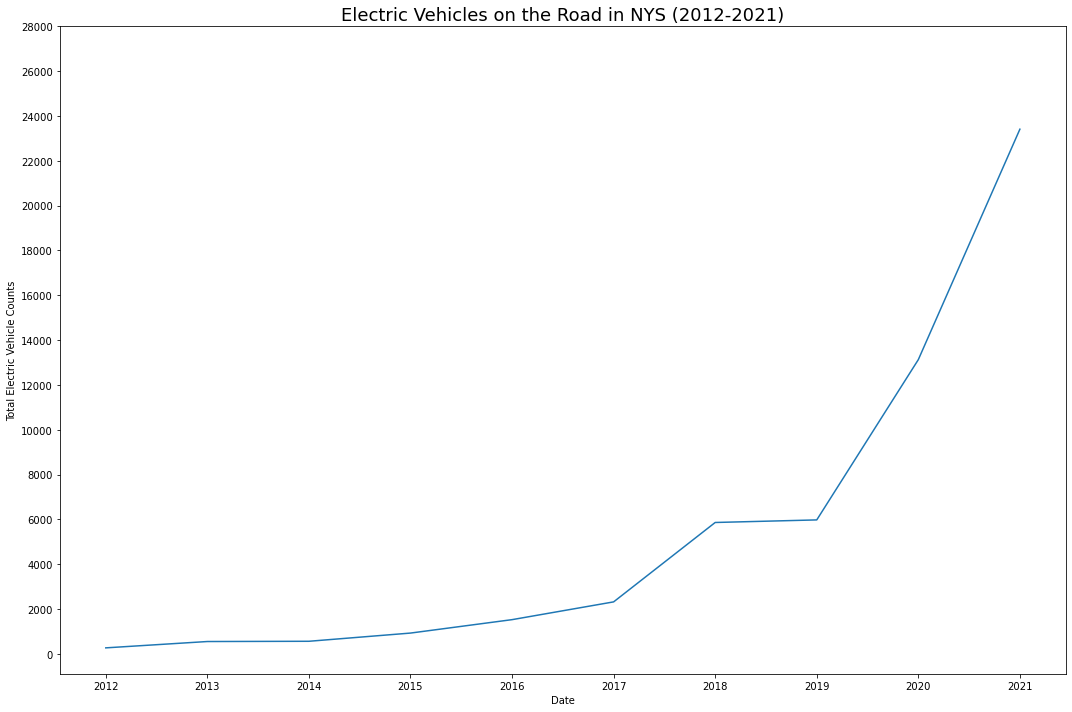

In [32]:
# Create a line chart
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='Year', y='Total Counts', data=Model_year_counts_df, ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Electric Vehicles on the Road in NYS (2012-2021)',fontsize=18)
ax.set_xticks(range(2012,2022,1))
ax.set_yticks(range(0,30000,2000))
plt.tight_layout()
plt.savefig('Images/EV_on_the_road_2012_2021.png', facecolor='white');

### Total Electric Vehicle Count by City (Top 10)

In [33]:
# Count the total numbers of electric vehicle per city
City_counts_df = pd.DataFrame(City_counts)
City_counts_df= City_counts_df.reset_index()
City_counts_df.columns = ['City','Total Counts']

# Select the top 10 city
City_counts_df.sort_values('Total Counts',ascending = False)
City_counts_10_df= City_counts_df.head(10)
City_counts_10_df

,City,Total Counts
0,BROOKLYN,10075
1,NEW YORK,3017
2,STATEN ISLAND,1270
3,ROCHESTER,1113
4,BRONX,830
5,SCARSDALE,810
6,GREAT NECK,590
7,SYOSSET,502
8,FLUSHING,494
9,DIX HILLS,465


In [34]:
top_10_cities = ['BROOKLYN', 'NEW YORK', 'STATEN ISLAND', 'ROCHESTER', 'BRONX', 
                  'SCARSDALE', 'GREAT NECK', 'SYOSSET', 'FLUSHING', 'DIX HILLS']

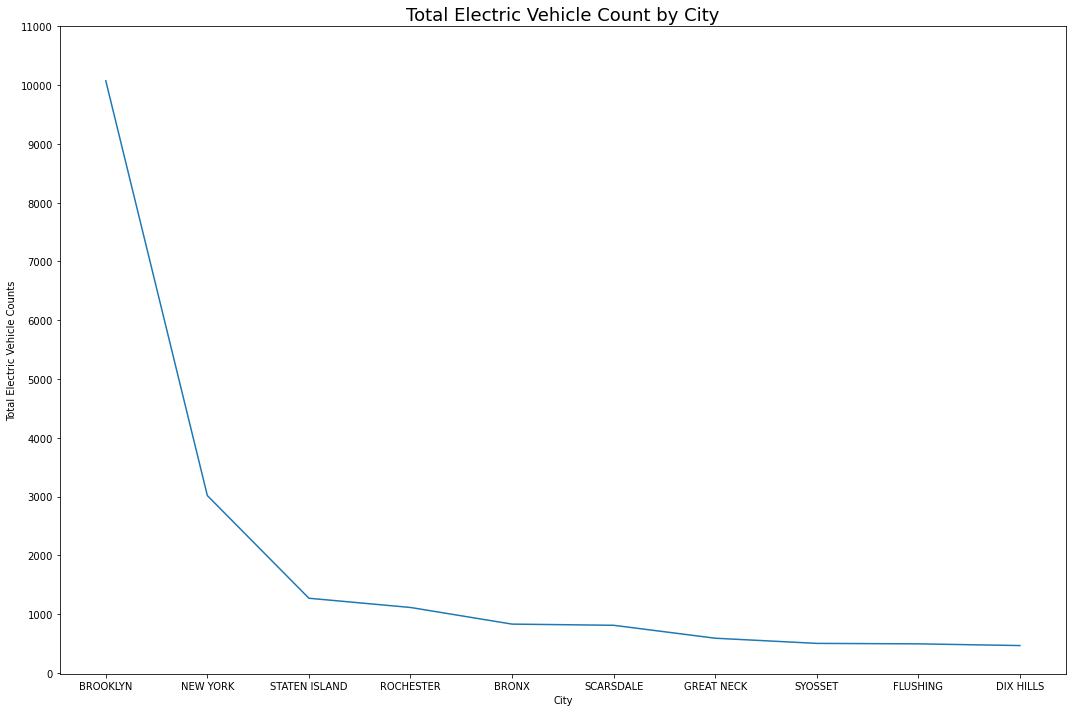

In [35]:
# Create a line chart
fig, ax = plt.subplots(figsize=(15,10))
sns.lineplot(x='City', y='Total Counts', data=City_counts_10_df, ax=ax)
ax.set_xlabel('City')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Total Electric Vehicle Count by City',fontsize=18)
ax.set_yticks(range(0,12000,1000))
plt.tight_layout()
plt.savefig('Images/EV_Count_by_City.png', facecolor='white');

### Total Electric Vehicle Count by County over time (2012-2021)

In [36]:
# Count the Electric Vehicle by County in each year
NYS_registrations_2012_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2012]
NYS_registrations_by_county_2012 = NYS_registrations_2012_df.County.value_counts()

NYS_registrations_2013_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2013]
NYS_registrations_by_county_2013 = NYS_registrations_2013_df.County.value_counts()

NYS_registrations_2014_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2014]
NYS_registrations_by_county_2014 = NYS_registrations_2014_df.County.value_counts()

NYS_registrations_2015_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2015]
NYS_registrations_by_county_2015 = NYS_registrations_2015_df.County.value_counts()

NYS_registrations_2016_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2016]
NYS_registrations_by_county_2016 = NYS_registrations_2016_df.County.value_counts()

NYS_registrations_2017_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2017]
NYS_registrations_by_county_2017 = NYS_registrations_2017_df.County.value_counts()

NYS_registrations_2018_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2018]
NYS_registrations_by_county_2018 = NYS_registrations_2018_df.County.value_counts()

NYS_registrations_2019_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2019]
NYS_registrations_by_county_2019 = NYS_registrations_2019_df.County.value_counts()

NYS_registrations_2020_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2020]
NYS_registrations_by_county_2020 = NYS_registrations_2020_df.County.value_counts()

NYS_registrations_2021_df = NYS_registrations_df.loc[NYS_registrations_df['Model Year'] == 2021]
NYS_registrations_by_county_2021 = NYS_registrations_2021_df.County.value_counts()

In [37]:
# Assemble into DataFrame
NYS_registrations_by_all_county_df = pd.DataFrame({
             "2012": NYS_registrations_by_county_2012,
             "2013": NYS_registrations_by_county_2013,
             "2014": NYS_registrations_by_county_2014,
             "2015": NYS_registrations_by_county_2015,
             "2016": NYS_registrations_by_county_2016,
             "2017": NYS_registrations_by_county_2017,
             "2018": NYS_registrations_by_county_2018,
             "2019": NYS_registrations_by_county_2019,
             "2020": NYS_registrations_by_county_2020,
             "2021": NYS_registrations_by_county_2021})

# NYS_registrations_by_county_df = NYS_registrations_by_county_df.reset_index()

NYS_registrations_by_all_county_df.head()

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ALBANY,5.0,18.0,15.0,23.0,57.0,61.0,115.0,142,181.0,276
ALLEGANY,1.0,1.0,NaN,NaN,NaN,2.0,3.0,1,1.0,12
BRONX,5.0,4.0,23.0,13.0,22.0,32.0,68.0,91,122.0,367
BROOME,5.0,5.0,11.0,13.0,10.0,32.0,27.0,30,46.0,76
CATTARAUGUS,NaN,1.0,2.0,NaN,4.0,NaN,1.0,4,4.0,10


In [38]:
# Drop County with NA values
NYS_registrations_by_county_df = NYS_registrations_by_all_county_df.dropna()

# Format
NYS_registrations_by_county_df["2012"] = NYS_registrations_by_county_df["2012"].map("{:.0f}".format)
NYS_registrations_by_county_df["2013"] = NYS_registrations_by_county_df["2013"].map("{:.0f}".format)
NYS_registrations_by_county_df["2014"] = NYS_registrations_by_county_df["2014"].map("{:.0f}".format)
NYS_registrations_by_county_df["2015"] = NYS_registrations_by_county_df["2015"].map("{:.0f}".format)
NYS_registrations_by_county_df["2016"] = NYS_registrations_by_county_df["2016"].map("{:.0f}".format)
NYS_registrations_by_county_df["2017"] = NYS_registrations_by_county_df["2017"].map("{:.0f}".format)
NYS_registrations_by_county_df["2018"] = NYS_registrations_by_county_df["2018"].map("{:.0f}".format)
NYS_registrations_by_county_df["2019"] = NYS_registrations_by_county_df["2019"].map("{:.0f}".format)
NYS_registrations_by_county_df["2020"] = NYS_registrations_by_county_df["2020"].map("{:.0f}".format)
NYS_registrations_by_county_df["2021"] = NYS_registrations_by_county_df["2021"].map("{:.0f}".format)

NYS_registrations_by_county_df

/var/folders/3t/9lx7hq193cxdwp8s46q298qm0000gp/T/ipykernel_19270/658162220.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYS_registrations_by_county_df["2012"] = NYS_registrations_by_county_df["2012"].map("{:.0f}".format)
/var/folders/3t/9lx7hq193cxdwp8s46q298qm0000gp/T/ipykernel_19270/658162220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NYS_registrations_by_county_df["2013"] = NYS_registrations_by_county_df["2013"].map("{:.0f}".format)
/var/folders/3t/9lx7hq193cxdwp8s46q298qm0000gp/T/ipykern

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
ALBANY,5,18,15,23,57,61,115,142,181,276
BRONX,5,4,23,13,22,32,68,91,122,367
BROOME,5,5,11,13,10,32,27,30,46,76
CHAUTAUQUA,2,2,2,3,3,13,8,26,19,33
CLINTON,2,4,2,2,6,6,9,18,17,34
DUTCHESS,9,14,9,23,32,70,121,152,188,409
ERIE,10,22,15,37,38,94,196,253,350,691
ESSEX,1,2,2,1,3,6,7,13,17,26
KINGS,9,31,36,41,84,90,331,327,3793,5122
MONROE,25,30,38,65,59,122,239,328,487,781


In [39]:
# Too many counties, select the top 10 counties based on the registrations number in 2021 
NYS_registrations_by_county_df = NYS_registrations_by_county_df.astype(int)
NYS_registrations_by_county_10_df = NYS_registrations_by_county_df.sort_values(['2021'],ascending = False).head(10).T
NYS_registrations_by_county_10_df

,KINGS,NASSAU,SUFFOLK,WESTCHESTER,QUEENS,NEW YORK,MONROE,ERIE,RICHMOND,ROCKLAND
2012,9,17,32,23,14,8,25,10,1,5
2013,31,52,60,72,60,41,30,22,6,13
2014,36,55,68,68,33,66,38,15,7,10
2015,41,108,90,131,42,89,65,37,11,19
2016,84,192,191,213,105,228,59,38,25,24
2017,90,286,256,298,159,195,122,94,46,46
2018,331,999,782,925,421,428,239,196,96,158
2019,327,843,768,838,420,353,328,253,123,117
2020,3793,1607,1426,1300,648,861,487,350,214,281
2021,5122,3391,2898,2538,1555,1125,781,691,565,512


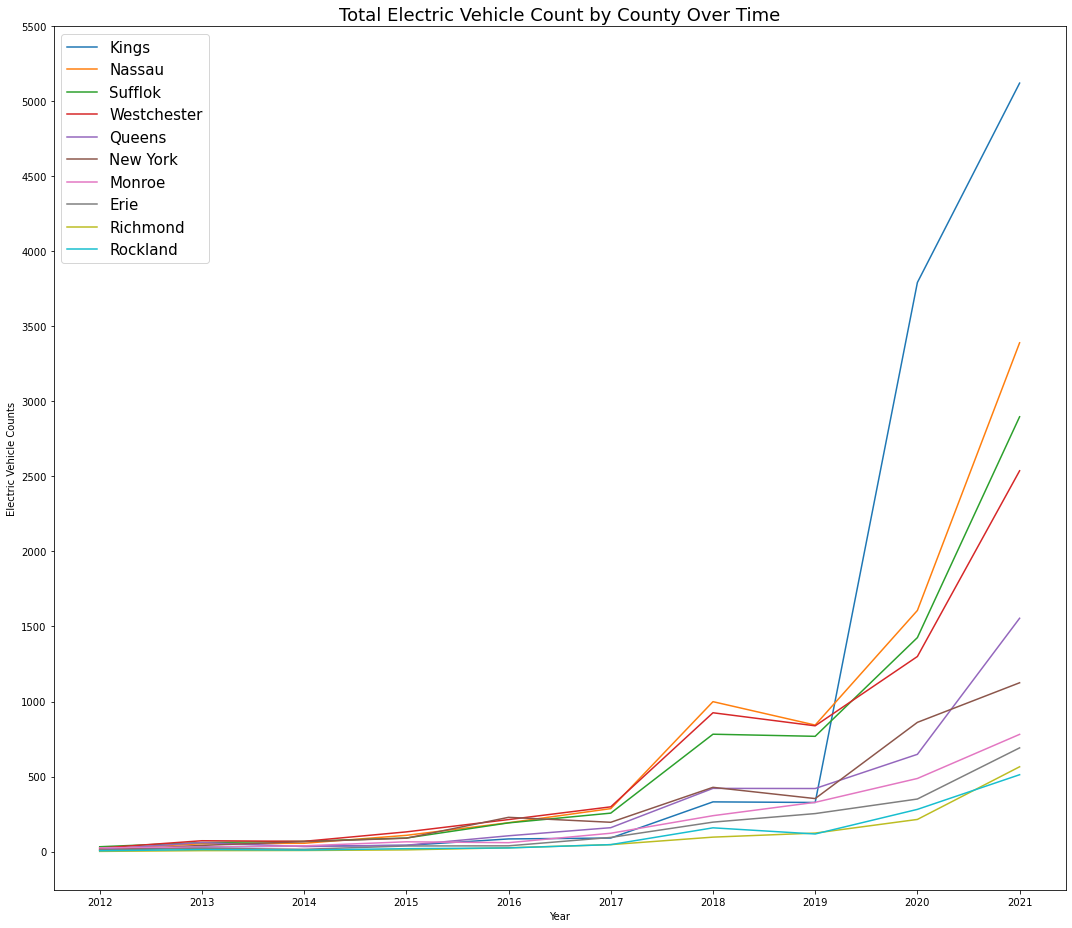

In [40]:
# Create a mutiple-line chart for the top 10 counties
fig, ax = plt.subplots(figsize=(15,13))
ax.plot(NYS_registrations_by_county_10_df['KINGS'],label='Kings')
ax.plot(NYS_registrations_by_county_10_df['NASSAU'],label='Nassau')
ax.plot(NYS_registrations_by_county_10_df['SUFFOLK'],label='Sufflok')
ax.plot(NYS_registrations_by_county_10_df['WESTCHESTER'],label='Westchester')
ax.plot(NYS_registrations_by_county_10_df['QUEENS'],label='Queens')
ax.plot(NYS_registrations_by_county_10_df['NEW YORK'],label='New York')
ax.plot(NYS_registrations_by_county_10_df['MONROE'],label='Monroe')
ax.plot(NYS_registrations_by_county_10_df['ERIE'],label='Erie')
ax.plot(NYS_registrations_by_county_10_df['RICHMOND'],label='Richmond')
ax.plot(NYS_registrations_by_county_10_df['ROCKLAND'],label='Rockland')

ax.set_xlabel('Year')
ax.set_ylabel('Electric Vehicle Counts')
ax.set_title('Total Electric Vehicle Count by County Over Time',fontsize=18)
ax.set_yticks(range(0,6000,500))
ax.legend(fontsize=15)
plt.tight_layout()
plt.savefig('Images/EV_Count_by_County_Over_Time.png', facecolor='white');

## Most Purchased Car Models by County

In [41]:
# Find the top 10 counties based on the total counts of electric vehicle
County_counts_df = pd.DataFrame(County_counts)
County_counts_df = County_counts_df.reset_index()
County_counts_df.columns = ['County','Total Counts']
County_counts_df.sort_values('Total Counts', ascending = False)
County_counts_10_df= County_counts_df.head(10)
County_counts_10_df

,County,Total Counts
0,KINGS,10212
1,NASSAU,8531
2,SUFFOLK,7369
3,WESTCHESTER,7170
4,QUEENS,3883
5,NEW YORK,3664
6,MONROE,2376
7,ERIE,1873
8,ROCKLAND,1346
9,RICHMOND,1270


In [42]:
# Top 10 Counties
top_10_county = ['KINGS', 'NASSAU','SUFFOLK','WESTCHESTER','QUEENS','NEW YORK','MONROE','ERIE','ROCKLAND','RICHMOND']


### Most Purchased Models in King County (Top 6)

In [43]:
# Pull the information about make and county from original dataset
County_model_counts_df=NYS_registrations_df[['County','Model Year','Make']]
County_model_counts_df.head()

,County,Model Year,Make
Reg Valid Date,,,
2014-07-01,FULTON,2012,BMW
2021-12-09,KINGS,2014,TOYOTA
2021-11-16,SUFFOLK,2013,TOYOTA
2021-10-19,ERIE,2016,MANIT
2021-08-11,RICHMOND,2019,HONDA


In [44]:
# Count the number of electric vehicle per model in Kings County
Kings_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'KINGS')]
Kings_model_counts = Kings_counts_df.Make.value_counts()
Kings_model_counts

NIU              6877
TESLA            2679
CHEVROLET         122
HYUNDAI            99
NISSAN             59
SMART              59
FORD               41
AUDI               38
VOLKSWAGEN         32
BMW                30
KIA                28
HINO               18
INTERNATIONAL      15
PORSCHE            14
ZERO EV            12
YALE               10
POLESTAR            8
VOLVO               8
MINI                7
NEW FLYER           6
GENESIS             5
PIAGGIO             4
TOYOTA              4
FIAT                3
HONDA               3
ICBUS               2
CRUS                2
RIVIAN              2
JAGUAR              2
CUSTO               2
GENZE               2
GEM                 1
DOOSA               1
AMPER               1
SUBARU              1
ALTA                1
GE/SC               1
AZURE               1
ETUK                1
JIAJ                1
LUCID               1
HA/DA               1
BAODI               1
CY/TR               1
FLYWI               1
MITSUBISHI

In [45]:
# Select the top 6 popular models
Kings_model_counts_df = pd.DataFrame(Kings_model_counts)
Kings_model_counts_6_df = Kings_model_counts_df .reset_index().head(6)
Kings_model_counts_6_df.columns = ['Model','Total Counts']
Kings_model_counts_6_df

,Model,Total Counts
0,NIU,6877
1,TESLA,2679
2,CHEVROLET,122
3,HYUNDAI,99
4,NISSAN,59
5,SMART,59


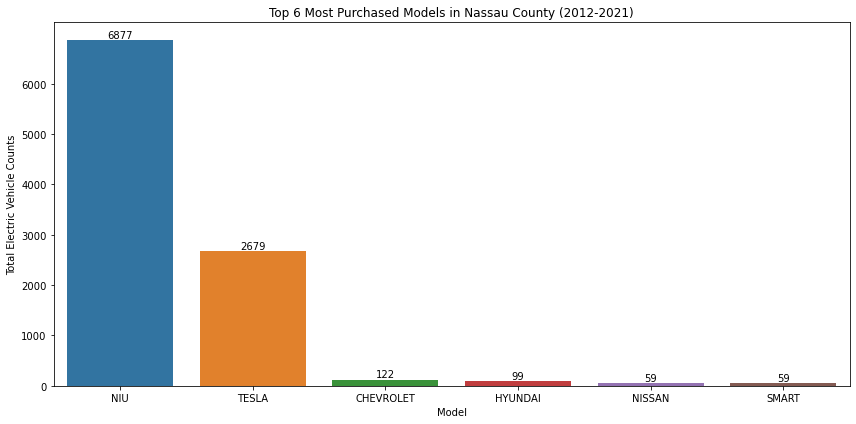

In [46]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Kings_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Nassau County (2012-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_King.png', facecolor='white');

### Most Purchased Models in Nassau County (Top 6)

In [47]:
# Count the number of electric vehicle per model in Nassau County
Nassau_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'NASSAU')]
Nassau_model_counts = Nassau_counts_df.Make.value_counts()
#Nassau_model_counts

In [48]:
# Select the top 6 popular models
Nassau_model_counts_df = pd.DataFrame(Nassau_model_counts)
Nassau_model_counts_6_df = Nassau_model_counts_df .reset_index().head(6)
Nassau_model_counts_6_df.columns = ['Model','Total Counts']
Nassau_model_counts_6_df

,Model,Total Counts
0,TESLA,6908
1,HYUNDAI,453
2,FORD,231
3,PORSCHE,176
4,CHEVROLET,168
5,AUDI,129


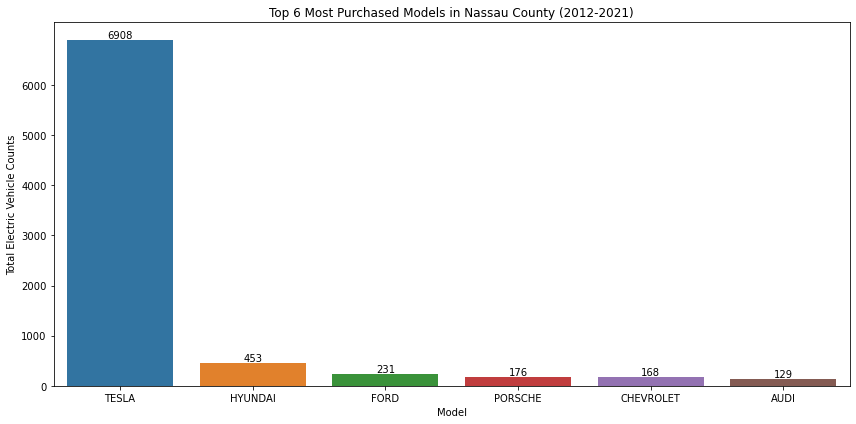

In [49]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Nassau_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Nassau County (2012-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Nassau.png', facecolor='white');

### Most Purchased Models in Suffolk County (Top 6)

In [50]:
# Count the number of electric vehicle per model 
Suffolk_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'SUFFOLK')]
Suffolk_model_counts = Suffolk_counts_df.Make.value_counts()
#Suffolk_model_counts

In [51]:
# Select the top 6 popular models
Suffolk_model_counts_df = pd.DataFrame(Suffolk_model_counts)
Suffolk_model_counts_6_df = Suffolk_model_counts_df .reset_index().head(6)
Suffolk_model_counts_6_df.columns = ['Model','Total Counts']
Suffolk_model_counts_6_df

,Model,Total Counts
0,TESLA,5572
1,HYUNDAI,466
2,CHEVROLET,239
3,FORD,239
4,NISSAN,175
5,PORSCHE,102


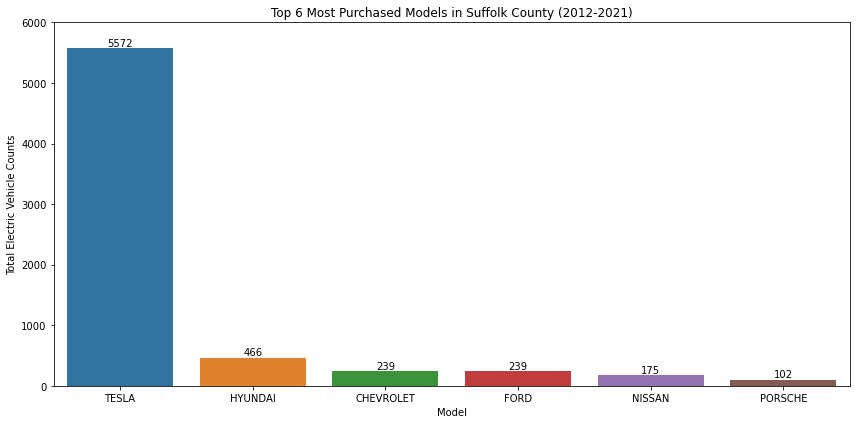

In [52]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Suffolk_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Suffolk County (2012-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Suffolk.png', facecolor='white');

### Most Purchased Models in Westchester County (Top 6)

In [53]:
# Count the number of electric vehicle per model 
Westchester_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'WESTCHESTER')]
Westchester_model_counts = Westchester_counts_df.Make.value_counts()
#Westchester_model_counts

In [54]:
# Select the top 6 popular models
Westchester_model_counts_df = pd.DataFrame(Westchester_model_counts)
Westchester_model_counts_6_df = Westchester_model_counts_df .reset_index().head(6)
Westchester_model_counts_6_df.columns = ['Model','Total Counts']
Westchester_model_counts_6_df

,Model,Total Counts
0,TESLA,5628
1,CHEVROLET,255
2,NISSAN,201
3,HYUNDAI,179
4,FORD,168
5,AUDI,137


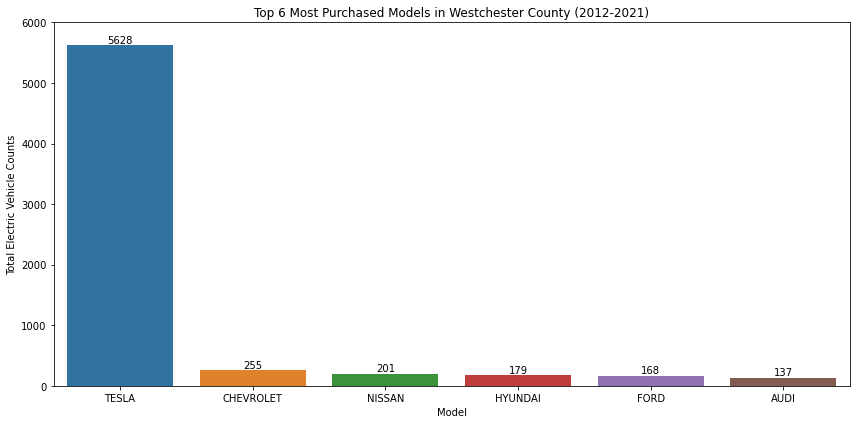

In [55]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Westchester_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Westchester County (2012-2021)')
ax.set_yticks(range(0,7000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Westchester.png', facecolor='white');

### Most Purchased Models in Queens County (Top 6)

In [56]:
# Count the number of electric vehicle per model 
Queens_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'QUEENS')]
Queens_model_counts = Queens_counts_df.Make.value_counts()
#Queens_model_counts

In [57]:
# Select the top 6 popular models
Queens_model_counts_df = pd.DataFrame(Queens_model_counts)
Queens_model_counts_6_df = Queens_model_counts_df .reset_index().head(6)
Queens_model_counts_6_df.columns = ['Model','Total Counts']
Queens_model_counts_6_df

,Model,Total Counts
0,TESLA,2967
1,CHEVROLET,249
2,NISSAN,148
3,HYUNDAI,130
4,FORD,95
5,KIA,56


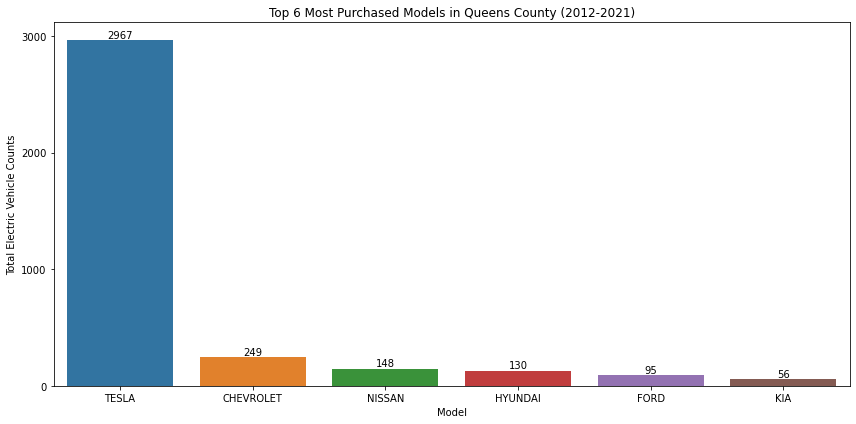

In [58]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Queens_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Queens County (2012-2021)')
ax.set_yticks(range(0,4000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Queens.png', facecolor='white');

### Most Purchased Models in New York County (Top 6)

In [59]:
# Count the number of electric vehicle per model 
New_York_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'NEW YORK')]
New_York_model_counts = New_York_counts_df.Make.value_counts()
#New_York_model_counts

In [60]:
# Select the top 6 popular models
New_York_model_counts_df = pd.DataFrame(New_York_model_counts)
New_York_model_counts_6_df = New_York_model_counts_df.reset_index().head(6)
New_York_model_counts_6_df.columns = ['Model','Total Counts']
New_York_model_counts_6_df

,Model,Total Counts
0,TESLA,2714
1,CHEVROLET,218
2,NISSAN,182
3,EL/SM,77
4,PORSCHE,70
5,AUDI,55


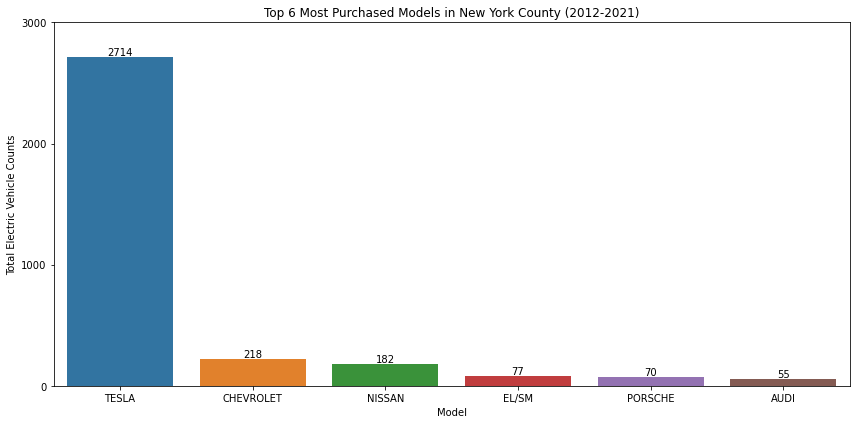

In [61]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=New_York_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in New York County (2012-2021)')
ax.set_yticks(range(0,4000,1000))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_New_York.png', facecolor='white');

### Most Purchased Models in Monroe County (Top 6)

In [62]:
# Count the number of electric vehicle per model 
Monroe_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'MONROE')]
Monroe_model_counts = Monroe_counts_df.Make.value_counts()
#Monroe_model_counts

In [63]:
# Select the top 6 popular models
Monroe_model_counts_df = pd.DataFrame(Monroe_model_counts)
Monroe_model_counts_6_df = Monroe_model_counts_df.reset_index().head(6)
Monroe_model_counts_6_df.columns = ['Model','Total Counts']
Monroe_model_counts_6_df

,Model,Total Counts
0,TESLA,1101
1,CHEVROLET,338
2,NISSAN,265
3,HYUNDAI,247
4,FORD,89
5,KIA,88


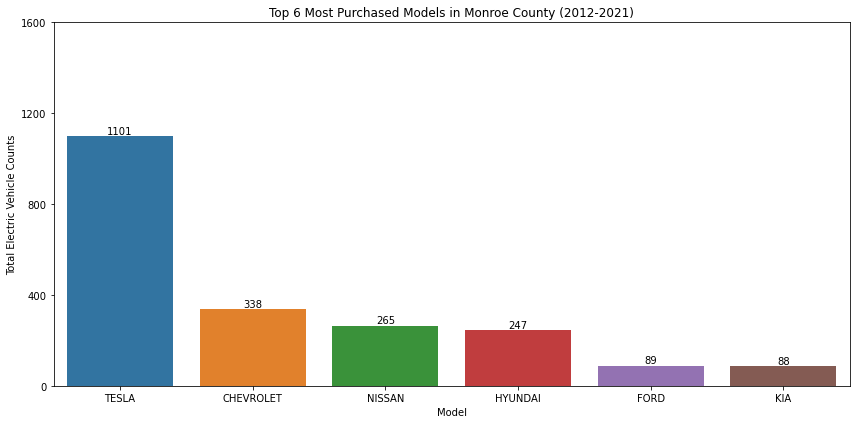

In [64]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Monroe_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Models in Monroe County (2012-2021)')
ax.set_yticks(range(0,2000,400))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Monroe.png', facecolor='white');

### Most Purchased Models in Erie County (Top 6)

In [65]:
# Count the number of electric vehicle per model 
Erie_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'ERIE')]
Erie_model_counts = Erie_counts_df.Make.value_counts()
#Erie_model_counts

In [66]:
# Select the top 6 popular models
Erie_model_counts_df = pd.DataFrame(Erie_model_counts)
Erie_model_counts_6_df = Erie_model_counts_df.reset_index().head(6)
Erie_model_counts_6_df.columns = ['Model','Total Counts']
Erie_model_counts_6_df

,Model,Total Counts
0,TESLA,902
1,HYUNDAI,321
2,CHEVROLET,194
3,FORD,124
4,NISSAN,119
5,VOLKSWAGEN,38


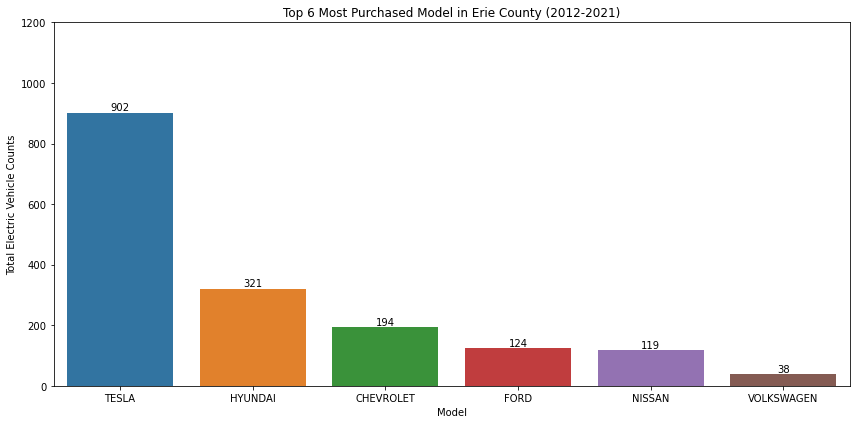

In [67]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Erie_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Model in Erie County (2012-2021)')
ax.set_yticks(range(0,1400,200))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Erie.png', facecolor='white');

### Most Purchased Models in Rockland County (Top 6)

In [68]:
# Count the number of electric vehicle per model 
Rockland_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'ROCKLAND')]
Rockland_model_counts = Rockland_counts_df.Make.value_counts()
#Rockland_model_counts

In [69]:
# Select the top 6 popular models
Rockland_model_counts_df = pd.DataFrame(Rockland_model_counts)
Rockland_model_counts_6_df = Rockland_model_counts_df.reset_index().head(6)
Rockland_model_counts_6_df.columns = ['Model','Total Counts']
Rockland_model_counts_6_df

,Model,Total Counts
0,TESLA,992
1,HYUNDAI,113
2,FORD,52
3,CHEVROLET,43
4,NISSAN,42
5,KIA,21


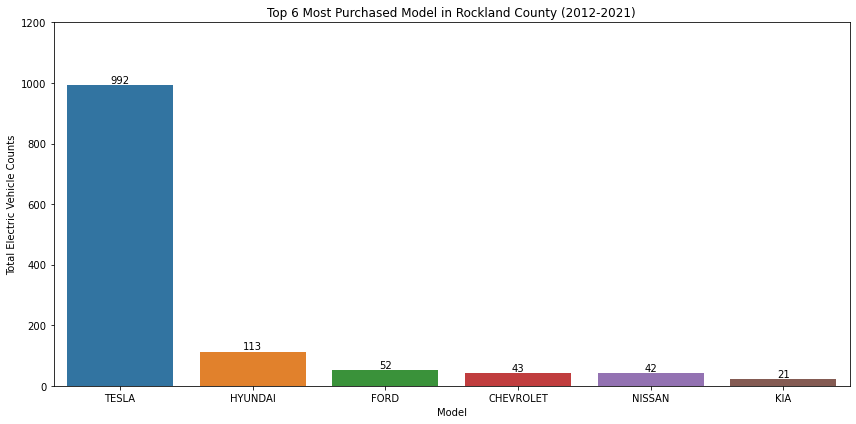

In [70]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Rockland_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Model in Rockland County (2012-2021)')
ax.set_yticks(range(0,1400,200))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Rockland.png', facecolor='white');

### Most Purchased Models in Richmond County (Top 6)

In [71]:
# Count the number of electric vehicle per model 
Richmond_counts_df = County_model_counts_df.loc[(County_model_counts_df['County'] == 'RICHMOND')]
Richmond_model_counts = Richmond_counts_df.Make.value_counts()
#Richmond_model_counts

In [72]:
# Select the top 6 popular models
Richmond_model_counts_df = pd.DataFrame(Richmond_model_counts)
Richmond_model_counts_6_df = Richmond_model_counts_df.reset_index().head(6)
Richmond_model_counts_6_df.columns = ['Model','Total Counts']
Richmond_model_counts_6_df

,Model,Total Counts
0,TESLA,961
1,HYUNDAI,94
2,FORD,51
3,NISSAN,26
4,CHEVROLET,25
5,PORSCHE,17


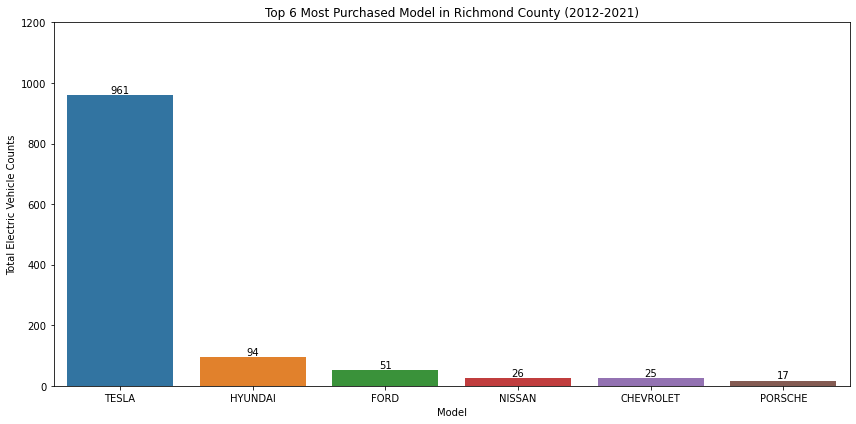

In [73]:
# Create a bar chart
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='Model', y='Total Counts', data=Richmond_model_counts_6_df, ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Total Electric Vehicle Counts')
ax.set_title('Top 6 Most Purchased Model in Richmond County (2012-2021)')
ax.set_yticks(range(0,1400,200))
for i in ax.containers:
    ax.bar_label(i,)
plt.tight_layout()
plt.savefig('Images/EV_Model_Count_in_Richmond.png', facecolor='white');